In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel('hw_1_dataset.xlsx')

In [3]:
df.head()

,datetime,promo,control_group_flg,client,transaction,transaction_amt,ruble_amt,bonus_amt
0,2020-01-02 17:10:09,Целевая 6% на Отток,False,212933236,106989004416,351.726307,176.569431,5.297083
1,2019-12-17 12:01:25,Контрольная 7% на Новых,True,247135596,105374806841,62.011184,62.011184,1.864573
2,2019-12-05 11:39:49,Целевая 6% на Отток,False,234967813,104137018370,163.856432,163.856432,9.831386
3,2019-12-09 16:41:33,Целевая 7% на Новых,False,213648274,104577635297,2402.756823,2402.756823,168.192978
4,2019-12-11 19:40:24,Целевая 7% на Новых,False,235025194,104807687619,266.972980,134.192768,9.393494


In [4]:
#проверим типы значений
df.dtypes

datetime             datetime64[ns]
promo                        object
control_group_flg              bool
client                        int64
transaction                   int64
transaction_amt             float64
ruble_amt                   float64
bonus_amt                   float64
dtype: object

In [5]:
#преобразуем дату в тип без времени
df['datetime'] = pd.to_datetime(df['datetime']).dt.date

In [6]:
#проверим что нет пустых значений
df.isna().mean()

datetime             0.0
promo                0.0
control_group_flg    0.0
client               0.0
transaction          0.0
transaction_amt      0.0
ruble_amt            0.0
bonus_amt            0.0
dtype: float64

In [7]:
#даты
df.groupby('datetime')['client'].agg(['count','nunique'])

,count,nunique
datetime,,
2019-12-03,793,744
2019-12-04,802,761
2019-12-05,756,705
2019-12-06,835,783
2019-12-07,536,503
2019-12-08,404,378
2019-12-09,777,732
2019-12-10,833,796
2019-12-11,821,771


In [8]:
#проверим что промо-группы не пересекаются

pg = df.groupby('promo')['client'].apply(set)

for pga in pg.keys():
    for pgb in pg.keys():
        if pga != pgb:
            inter = pg[pga].intersection(pg[pgb])
            if inter:
                print(f"пересекаются {pga} и {pgb}: {len(inter)}")
            else:
                print(f"не пересекаются {pga} и {pgb}")

не пересекаются Контрольная 6% на Отток и Контрольная 7% на Новых
не пересекаются Контрольная 6% на Отток и Целевая 6% на Отток
не пересекаются Контрольная 6% на Отток и Целевая 7% на Новых
не пересекаются Контрольная 7% на Новых и Контрольная 6% на Отток
не пересекаются Контрольная 7% на Новых и Целевая 6% на Отток
не пересекаются Контрольная 7% на Новых и Целевая 7% на Новых
не пересекаются Целевая 6% на Отток и Контрольная 6% на Отток
не пересекаются Целевая 6% на Отток и Контрольная 7% на Новых
не пересекаются Целевая 6% на Отток и Целевая 7% на Новых
не пересекаются Целевая 7% на Новых и Контрольная 6% на Отток
не пересекаются Целевая 7% на Новых и Контрольная 7% на Новых
не пересекаются Целевая 7% на Новых и Целевая 6% на Отток


In [9]:
#размеры групп по участникам
df.groupby("promo")[["client"]].nunique()

,client
promo,
Контрольная 6% на Отток,342
Контрольная 7% на Новых,1474
Целевая 6% на Отток,3545
Целевая 7% на Новых,13378


In [10]:
df.groupby("control_group_flg")[["client"]].nunique()

,client
control_group_flg,
False,16923
True,1816


<Axes: xlabel='datetime'>

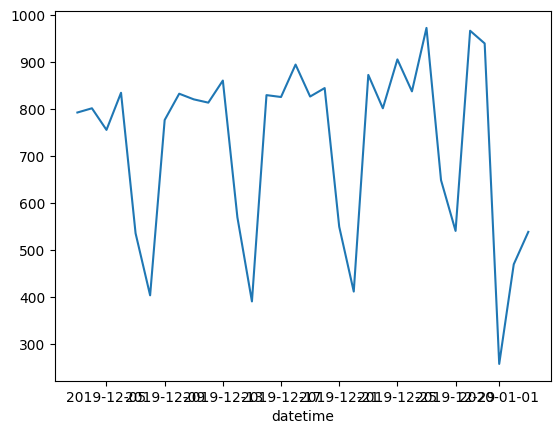

In [11]:
df.groupby('datetime')['client'].count().plot()

In [12]:
#в качестве юнита возьмем клиента, остальные метрики сгрупирруем как сумму и добавим число транзакций 
g = {'transaction_amt':lambda x: x.sum(), 
     'ruble_amt':lambda x: x.sum(), 
     'bonus_amt':lambda x: x.sum(),
     'transaction' :lambda x: x.nunique()
    }

df_new = df.groupby(['promo', 'control_group_flg', 'client']).agg(g).reset_index()

In [13]:
df_new

,promo,control_group_flg,client,transaction_amt,ruble_amt,bonus_amt,transaction
0,Контрольная 6% на Отток,True,202421625,428.428068,428.428068,12.854255,1
1,Контрольная 6% на Отток,True,202466057,1695.349053,848.945826,25.468375,2
2,Контрольная 6% на Отток,True,202756081,1994.245786,1994.245786,59.821723,2
3,Контрольная 6% на Отток,True,202820385,316.045157,316.045157,9.492373,2
4,Контрольная 6% на Отток,True,202878156,254.259981,254.259981,7.627799,1
...,...,...,...,...,...,...,...
18734,Целевая 7% на Новых,False,449778614,42.376664,42.376664,2.966366,1
18735,Целевая 7% на Новых,False,449800253,173.179298,173.179298,12.119726,1
18736,Целевая 7% на Новых,False,450143173,152.555989,152.555989,10.678919,1
18737,Целевая 7% на Новых,False,450289396,215.979729,215.979729,15.128469,1


In [14]:
df_new.rename(columns = {'transaction':'tr_cnt'}, inplace = True)

In [15]:
df_new.sort_values('tr_cnt')

,promo,control_group_flg,client,transaction_amt,ruble_amt,bonus_amt,tr_cnt
0,Контрольная 6% на Отток,True,202421625,428.428068,428.428068,12.854255,1
11972,Целевая 7% на Новых,False,220973477,211.742062,211.742062,14.831832,1
11973,Целевая 7% на Новых,False,220974002,69.215217,69.215217,4.845065,1
11974,Целевая 7% на Новых,False,220974078,394.102971,197.051485,13.800667,1
11975,Целевая 7% на Новых,False,220974393,28.251109,14.125555,0.988789,1
...,...,...,...,...,...,...,...
2611,Целевая 6% на Отток,False,213265918,3761.635167,1882.230139,64.567910,7
771,Контрольная 7% на Новых,True,213660752,4093.303187,2050.041727,61.502664,7
3021,Целевая 6% на Отток,False,213935703,2468.440651,1341.433284,41.656260,7
1823,Целевая 6% на Отток,False,202436671,2114.171744,1155.046593,40.031821,9


In [16]:
df_new.sort_values('transaction_amt')

,promo,control_group_flg,client,transaction_amt,ruble_amt,bonus_amt,tr_cnt
5604,Целевая 7% на Новых,False,205327212,2.514349,2.514349,0.169507,1
9202,Целевая 7% на Новых,False,213574616,2.825111,2.825111,0.197758,1
18693,Целевая 7% на Новых,False,446555706,2.825111,2.825111,0.197758,1
6897,Целевая 7% на Новых,False,212927055,2.825111,2.825111,0.197758,1
8665,Целевая 7% на Новых,False,213367611,2.825111,2.825111,0.197758,1
...,...,...,...,...,...,...,...
3625,Целевая 6% на Отток,False,220627494,16341.868143,15223.971759,875.431241,2
7807,Целевая 7% на Новых,False,213168517,16809.409872,14437.729269,1010.641049,1
16056,Целевая 7% на Новых,False,244611786,16833.423315,12893.806161,502.361221,3
1174,Контрольная 7% на Новых,True,228457801,18773.991994,12218.576404,366.558140,2


In [17]:
#уберем экстремальные значения, тем самым снизим дисперсию
df_new = df_new[df_new['transaction_amt'] < 50000]
df_new = df_new[df_new['tr_cnt'] < 21]

In [18]:
#введем доп метрики

In [19]:
#оборот бонусов (оплата части чека бонусами)
df_new['bonus_oborot_amt'] = df_new['transaction_amt'] - df_new['ruble_amt']

In [20]:
#флаг использования бонусного счета в качестве оплаты части чека 
df_new['bon_flg'] = np.where(df_new.bonus_oborot_amt == 0.0, 0, 1)

In [21]:
#revenue
df_new['real_amt'] = df_new['ruble_amt'] - df_new['bonus_amt']

In [22]:
df_new['real_amt1'] = df_new['transaction_amt'] - df_new['bonus_amt']

In [23]:
df_new

,promo,control_group_flg,client,transaction_amt,ruble_amt,bonus_amt,tr_cnt,bonus_oborot_amt,bon_flg,real_amt,real_amt1
0,Контрольная 6% на Отток,True,202421625,428.428068,428.428068,12.854255,1,0.000000,0,415.573814,415.573814
1,Контрольная 6% на Отток,True,202466057,1695.349053,848.945826,25.468375,2,846.403227,1,823.477452,1669.880678
2,Контрольная 6% на Отток,True,202756081,1994.245786,1994.245786,59.821723,2,0.000000,0,1934.424063,1934.424063
3,Контрольная 6% на Отток,True,202820385,316.045157,316.045157,9.492373,2,0.000000,0,306.552784,306.552784
4,Контрольная 6% на Отток,True,202878156,254.259981,254.259981,7.627799,1,0.000000,0,246.632182,246.632182
...,...,...,...,...,...,...,...,...,...,...,...
18734,Целевая 7% на Новых,False,449778614,42.376664,42.376664,2.966366,1,0.000000,0,39.410297,39.410297
18735,Целевая 7% на Новых,False,449800253,173.179298,173.179298,12.119726,1,0.000000,0,161.059573,161.059573
18736,Целевая 7% на Новых,False,450143173,152.555989,152.555989,10.678919,1,0.000000,0,141.877070,141.877070
18737,Целевая 7% на Новых,False,450289396,215.979729,215.979729,15.128469,1,0.000000,0,200.851260,200.851260


In [24]:
#посчитаем статистики в группах для каждой метрики

In [25]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['transaction_amt'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,transaction_amt,transaction_amt,transaction_amt,transaction_amt
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,1013.614427,815.821525,464.405856
Контрольная 7% на Новых,True,1474,1215.451235,768.285355,393.961715
Целевая 6% на Отток,False,3543,1088.715614,846.251501,483.122216
Целевая 7% на Новых,False,13378,1194.681060,814.808468,401.165748


In [26]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['ruble_amt'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,ruble_amt,ruble_amt,ruble_amt,ruble_amt
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,849.383997,591.564717,308.148972
Контрольная 7% на Новых,True,1474,861.728128,516.798045,265.560425
Целевая 6% на Отток,False,3543,860.021244,588.717134,300.591800
Целевая 7% на Новых,False,13378,889.703400,556.802870,265.560425


In [27]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['bonus_amt'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,bonus_amt,bonus_amt,bonus_amt,bonus_amt
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,25.481739,17.747644,9.245175
Контрольная 7% на Новых,True,1474,25.851813,15.504579,7.966813
Целевая 6% на Отток,False,3543,46.777940,31.632427,16.611652
Целевая 7% на Новых,False,13378,55.732232,35.139054,17.303804


In [28]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['tr_cnt'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,tr_cnt,tr_cnt,tr_cnt,tr_cnt
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,0.590210,1.266082,1
Контрольная 7% на Новых,True,1474,0.563741,1.204885,1
Целевая 6% на Отток,False,3543,0.671360,1.298899,1
Целевая 7% на Новых,False,13378,0.562751,1.218493,1


In [29]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['bonus_oborot_amt'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,bonus_oborot_amt,bonus_oborot_amt,bonus_oborot_amt,bonus_oborot_amt
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,312.428359,224.256808,104.529103
Контрольная 7% на Новых,True,1474,470.033291,251.487309,76.277994
Целевая 6% на Отток,False,3543,382.228537,257.534367,124.304880
Целевая 7% на Новых,False,13378,451.286302,258.005598,84.753327


In [30]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['bon_flg'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,bon_flg,bon_flg,bon_flg,bon_flg
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,0.483083,0.631579,1
Контрольная 7% на Новых,True,1474,0.492688,0.586160,1
Целевая 6% на Отток,False,3543,0.465801,0.681908,1
Целевая 7% на Новых,False,13378,0.490793,0.595605,1


In [31]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['real_amt'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,real_amt,real_amt,real_amt,real_amt
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,823.902258,573.817073,298.903796
Контрольная 7% на Новых,True,1474,835.876315,501.293467,257.593612
Целевая 6% на Отток,False,3543,814.503201,557.084707,282.821852
Целевая 7% на Новых,False,13378,835.784105,521.663816,247.168953


In [32]:
df_new.pivot_table(index=['promo', 'control_group_flg'],
                                values=['real_amt1'],
                                aggfunc=[ 'count' ,np.std, np.mean, np.median]).sort_values('promo')

,,count,std,mean,median
,,real_amt1,real_amt1,real_amt1,real_amt1
promo,control_group_flg,,,,
Контрольная 6% на Отток,True,342,989.204353,798.073881,453.811690
Контрольная 7% на Новых,True,1474,1190.806858,752.780776,382.279882
Целевая 6% на Отток,False,3543,1046.319243,814.619074,463.191058
Целевая 7% на Новых,False,13378,1144.690340,779.669415,382.520016


In [33]:
#об эффективности проведенной акции мы можем судить лишь по одной метрике(зафиксировав ур. знач alpha = 0.05), 
#так как принятие во внимание несколько ключевых метрик равносильно множественной проверке гипотез с принятием уровня значимости
#c поправкой Бонферони(Холма-Бонферони), но учитывая std, размер sampl'ов и наблюдаемая p-статистика каждой метрики
#по отдельности не будет его пробовивать, соответственно принять решение об отклонении H0 мы не сможем
#разумнее будет взять ключевую метрику real_amt = ruble_amt - bonus_amt по которой как раз и можно судить об эффективности 
#акции в целом (revenue)

<Axes: >

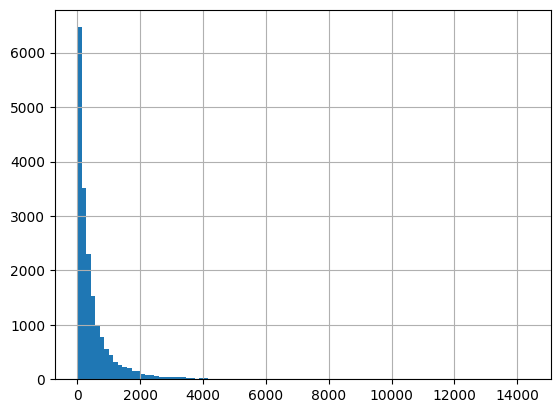

In [34]:
df_new['real_amt'].hist(bins = 100)

In [35]:
#наблюдаем логнормальное распределение

In [36]:
#применим bootstrap критерий для медиан

from tqdm.auto import tqdm
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, norm

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 20000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости 1 - alpha
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [37]:
x = df_new[df_new['promo'] == 'Целевая 6% на Отток']['real_amt']
y = df_new[df_new['promo'] == 'Контрольная 6% на Отток']['real_amt']
x1 = df_new[df_new['promo'] == 'Целевая 7% на Новых']['real_amt']
y1 = df_new[df_new['promo'] == 'Контрольная 7% на Новых']['real_amt']

  0%|          | 0/20000 [00:00<?, ?it/s]

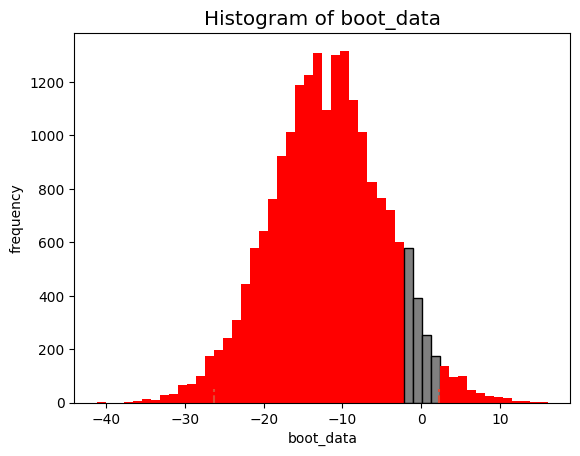

0.10305118550545356

In [38]:
booted_data = get_bootstrap(x, y) 
booted_data["p_value"]

  0%|          | 0/20000 [00:00<?, ?it/s]

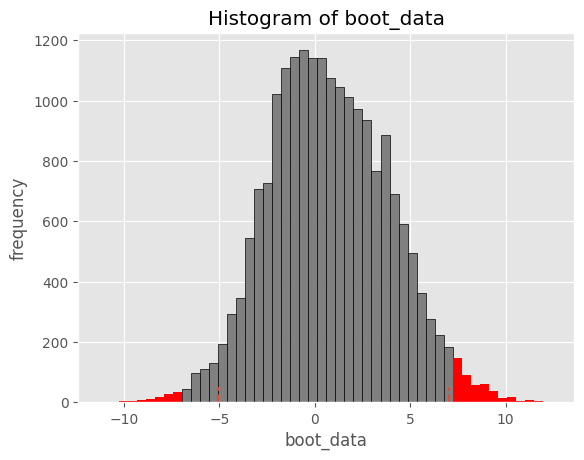

0.8091965491381831

In [39]:
booted_data = get_bootstrap(x1, y1) 
booted_data["p_value"]

In [40]:
#в обоих группах тест/контроль тест не покрасился, p > 0.05

In [41]:
import scipy.stats as stats

#perform the Mann-Whitney U test
stats. mannwhitneyu (x, y, alternative='two-sided')

MannwhitneyuResult(statistic=588848.5, pvalue=0.3906689158119204)

In [42]:
import scipy.stats as stats

#perform the Mann-Whitney U test
stats. mannwhitneyu (x1, y1, alternative='two-sided')

MannwhitneyuResult(statistic=9874483.0, pvalue=0.9240361180903859)

In [43]:
#U критерий так же указывает на p > 0.05

In [44]:
#статзначимых различий нет, нестатзначимые различия указывают на уменьшение revenue в обоих тестовых группах